In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
import galsim
from copy import deepcopy

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.instruments.roman import Roman
from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import gs

Computing on pixel grid of size 47x47 (5.17"x5.17") with pixel scale 0.11 arcsec/pixel (natively 0.11 arcsec/pixel oversampled by factor 1)
Initialized SyntheticImage for StrongLens SAMPLE by Roman in F184 band
Exposure calculation time with lenstronomy engine: 0:00:00


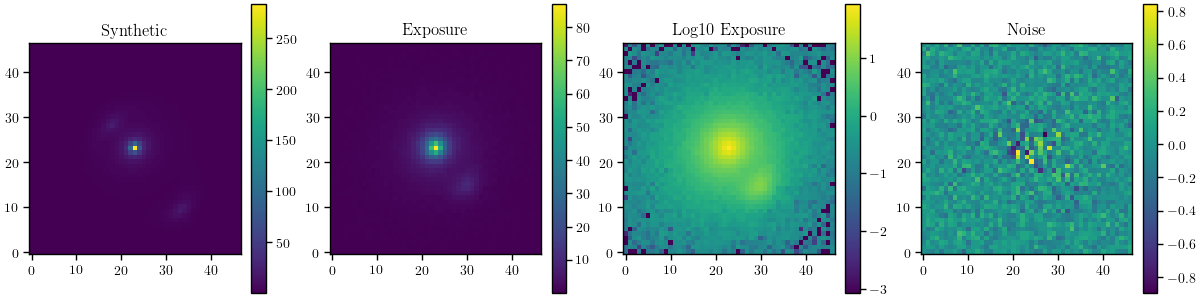

In [2]:
lens = SampleStrongLens()
roman = Roman()
band = 'F184'
scene_size = 5  # arcsec
oversample = 1
exposure_time = 146
instrument_params = {
    'detector': 1,
    'detector_position': (2048, 2048)
}

synth = SyntheticImage(lens, roman, band, arcsec=scene_size, oversample=oversample, pieces=False, verbose=True, instrument_params=instrument_params)
# psf = np.load('/grad/bwedig/mejiro/tests/test_data/F106_1_2048_2048_1_47.npy')

exposure = Exposure(synth, exposure_time=exposure_time, engine='lenstronomy', psf=None, verbose=True)

_, ax = plt.subplots(1, 4, figsize=(12, 3), constrained_layout=True)
ax0 = ax[0].imshow(synth.image)
ax1 = ax[1].imshow(exposure.exposure)
ax2 = ax[2].imshow(np.log10(exposure.exposure))
ax3 = ax[3].imshow(exposure.noise)

plt.colorbar(ax0, ax=ax[0])
plt.colorbar(ax1, ax=ax[1])
plt.colorbar(ax2, ax=ax[2])
plt.colorbar(ax3, ax=ax[3])

ax[0].set_title('Synthetic')
ax[1].set_title('Exposure')
ax[2].set_title('Log10 Exposure')
ax[3].set_title('Noise')

plt.show()